<a href="https://colab.research.google.com/github/shriii1389/IO-Slot-14-Final-project/blob/main/HashcodeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U imbalanced-learn


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download azalhowaide/iot-dataset-for-intrusion-detection-systems-ids/



iot-dataset-for-intrusion-detection-systems-ids.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip iot-dataset-for-intrusion-detection-systems-ids.zip

# Rename the unzipped folder to "datasets"
!mv BoTNeTIoT-L01-v2.csv datasets


Archive:  iot-dataset-for-intrusion-detection-systems-ids.zip
  inflating: BoTNeTIoT-L01-v2.csv    
replace BotNeTIoT-L01_label_NoDuplicates.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
import pandas as pd
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [3]:
datasets=pd.read_csv('/content/BoTNeTIoT-L01-v2.csv')
#X = datasets.drop('target_column', axis=1)
#y = datasets['target_column']
print('The dataset shape = ',datasets.shape)




The dataset shape =  (53484, 27)


In [4]:
print(datasets.columns)
print(datasets.describe())
print(datasets.isna().sum())
print(datasets.info())
print(len(datasets.columns))


Index(['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
       'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_weight',
       'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius',
       'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_weight',
       'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight',
       'HpHp_L0.1_mean', 'HpHp_L0.1_std', 'HpHp_L0.1_magnitude',
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'Device_Name', 'Attack', 'Attack_subType', 'label'],
      dtype='object')
       MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
count        53484.000000      53484.000000          53484.000000   
mean          6517.481504         74.333425            213.109181   
std           1597.350653          0.341960            245.575719   
min              1.000000         74.026127              0.000000   
25%           5903.968970         74.114070             29.007629   
50%     

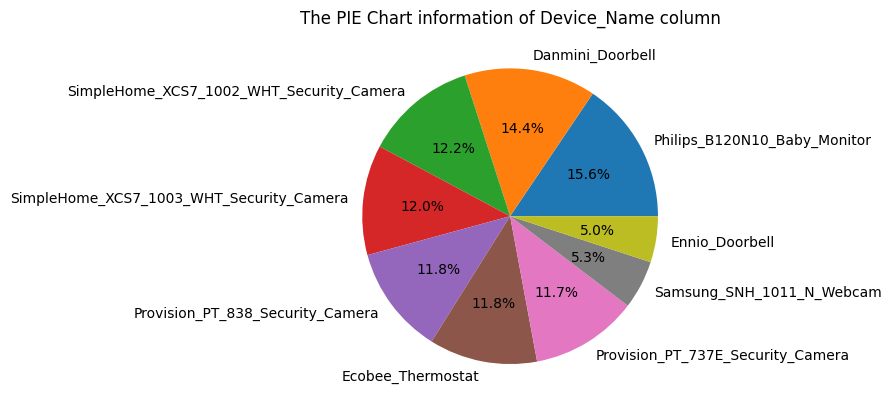

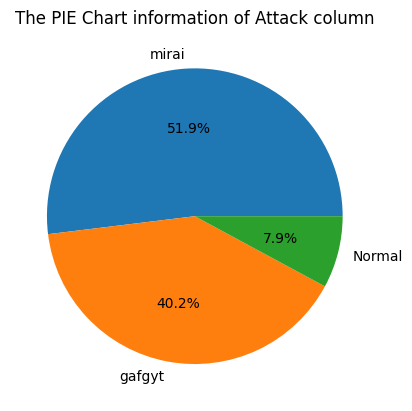

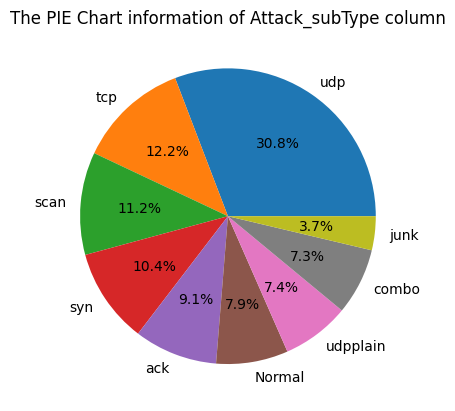

In [ ]:
import matplotlib.pyplot as plt

for i in datasets.select_dtypes(include='object').columns.values:
    if len(datasets[i].value_counts()) <=10:
        val=datasets[i].value_counts().values
        index=datasets[i].value_counts().index
        plt.pie(val,labels=index,autopct='%1.1f%%')
        plt.title(f'The PIE Chart information of {i} column')
        plt.show()

In [ ]:
for i in datasets.select_dtypes(include='object').columns.values:
    print(datasets[i].value_counts())
    print("--------------------------------")

Philips_B120N10_Baby_Monitor                1098677
Danmini_Doorbell                            1018298
SimpleHome_XCS7_1002_WHT_Security_Camera     863056
SimpleHome_XCS7_1003_WHT_Security_Camera     850826
Provision_PT_838_Security_Camera             836891
Ecobee_Thermostat                            835876
Provision_PT_737E_Security_Camera            828260
Samsung_SNH_1011_N_Webcam                    375222
Ennio_Doorbell                               355500
Name: Device_Name, dtype: int64
--------------------------------
mirai     3668402
gafgyt    2838272
Normal     555932
Name: Attack, dtype: int64
--------------------------------
udp         2176365
tcp          859850
scan         793090
syn          733299
ack          643821
Normal       555932
udpplain     523304
combo        515156
junk         261789
Name: Attack_subType, dtype: int64
--------------------------------


In [5]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in datasets.select_dtypes(include='object').columns.values:
    datasets[i]=lab.fit_transform(datasets[i])

In [7]:
import numpy as np
x={}
X=[]
for i in datasets.columns.values:
    datasets['z-scores']=(datasets[i]-datasets[i].mean())/(datasets[i].std())
    outliers=np.abs(datasets['z-scores'] > 3).sum()
    x[i]=outliers

In [8]:
for keys,values in x.items():
    if values>0:
        X.append(keys)
print(x)

{'MI_dir_L0.1_weight': 0, 'MI_dir_L0.1_mean': 6, 'MI_dir_L0.1_variance': 509, 'H_L0.1_weight': 0, 'H_L0.1_mean': 6, 'H_L0.1_variance': 509, 'HH_L0.1_weight': 0, 'HH_L0.1_mean': 32, 'HH_L0.1_std': 37, 'HH_L0.1_magnitude': 51, 'HH_L0.1_radius': 31, 'HH_L0.1_covariance': 22, 'HH_L0.1_pcc': 90, 'HH_jit_L0.1_weight': 0, 'HH_jit_L0.1_mean': 48, 'HH_jit_L0.1_variance': 58, 'HpHp_L0.1_weight': 132, 'HpHp_L0.1_mean': 32, 'HpHp_L0.1_std': 22, 'HpHp_L0.1_magnitude': 48, 'HpHp_L0.1_radius': 22, 'HpHp_L0.1_covariance': 20, 'HpHp_L0.1_pcc': 20, 'Device_Name': 1, 'Attack': 1, 'Attack_subType': 1, 'label': 0}


In [9]:
x=[]

thresh=2
for i in datasets[X].columns.values:
    upper=datasets[i].mean()+thresh*datasets[i].std()
    lower=datasets[i].mean()-thresh*datasets[i].std()
    data=datasets[(datasets[i]>lower)&(datasets[i]<upper)]

print(len(datasets))

53484


In [10]:
corr=data.corr()['Attack']
corr=corr.drop(['Attack','z-scores','label'])
for i in corr.index:
    print(i)
    if corr[i] > 0.25:
        x.append(i)

MI_dir_L0.1_weight
MI_dir_L0.1_mean
MI_dir_L0.1_variance
H_L0.1_weight
H_L0.1_mean
H_L0.1_variance
HH_L0.1_weight
HH_L0.1_mean
HH_L0.1_std
HH_L0.1_magnitude
HH_L0.1_radius
HH_L0.1_covariance
HH_L0.1_pcc
HH_jit_L0.1_weight
HH_jit_L0.1_mean
HH_jit_L0.1_variance
HpHp_L0.1_weight
HpHp_L0.1_mean
HpHp_L0.1_std
HpHp_L0.1_magnitude
HpHp_L0.1_radius
HpHp_L0.1_covariance
HpHp_L0.1_pcc
Device_Name
Attack_subType


In [11]:
#X=data[x]
#data['z-scores']=lab.fit_transform(data['z-scores'])
#y=data['z-scores']

X=datasets[x]
datasets['Attack']=lab.fit_transform(datasets['Attack'])
Y=datasets['Attack']
x_train,x_test,y_train,y_test=train_test_split(X,Y)

#lr = LogisticRegression(max_iter=500)
#lr.fit(x_train, y_train)
#print('The logistic regression: ', lr.score(x_test, y_test))

#lgb = LGBMClassifier()
#lgb.fit(x_train, y_train)
#print('The LGB', lgb.score(x_test, y_test))

#tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
#tree.fit(x_train, y_train)
#print('Dtree ', tree.score(x_test,y_test))


In [12]:
# Define the subsampling ratio (e.g., 0.5 for 50% subsampling)
subsampling_ratio = 0.05


In [13]:
num_samples_to_retain = int(subsampling_ratio * len(X))

# Generate random indices to select samples from the dataset
random_indices = np.random.choice(len(X), num_samples_to_retain, replace=False)


In [14]:
random_indices = np.random.choice(len(x_train), num_samples_to_retain, replace=False)

# Subsample the training data based on the random indices
x_train_subsampled = x_train.iloc[random_indices]
y_train_subsampled = y_train.iloc[random_indices]


In [16]:
!pip install imbalanced-learn
from imblearn.over_sampling import KMeansSMOTE

In [18]:
kmeans_smote = KMeansSMOTE()
x_train_subsampled = pd.DataFrame({"feature_1": [1, 2, 3], "feature_2": [4, 5, 6]})

X_train_oversampled, y_train_oversampled = kmeans_smote.fit_resample(x_train_subsampled.values, y_train_subsampled.values)


ValueError: Found input variables with inconsistent numbers of samples: [3, 2674]

In [19]:
# Train a classification model on the oversampled dataset
model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using precision, recall, F1-score, and AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'AUC: {auc}')


NameError: name 'X_train_oversampled' is not defined